**Abstract**

Para esta tarea quise abordar un tema importante que afecta a muchos en estos tiempos donde abundan la tecnología, la falta de relacionamiento físico y una alta carga laboral. Se trata de la salud mental en las personas con trabajo, ya que hoy en día vemos presente en ellas trastornos psicológicos como ansiedad, depresión y burnout, que afectan a su calidad de vida y en su desempeño laboral.

Para el estudio se utilizó la base de datos proveniente del siguiente link:

https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health/data




**Hipótesis y Preguntas**

1. ¿Cuál es las condición de salud mental más frecuente en el mundo laboral?
2. ¿La edad afecta positiva o negativamente en la salud mental?
3. ¿Los trastornos psicológicos tienen relación con las horas de trabajo? De ser así, ¿la edad tiene relación con la cantidad de horas trabajadas a la semana?
4. ¿Existe una tendencia entre la puntuación del balance de la vida laboral y personal, y el desarrollo de un trastorno psicológico?
5. ¿Existe una tendencia o relación entre los trastornos psicológicos y el aislamiento social?



**Dataframe, NaN, variables categóricas y muestras**

In [2]:
#importanción de las librerías

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
#Lectura de la base de datos y primeras filas

df = pd.read_csv('Remote_Work_and_Mental_Health.csv', index_col=0)
df.head()

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
Employee_ID,,,,,,,,,,,,,,,,,,,
EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [4]:
#Identificando las columnas y sus características

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, EMP0001 to EMP5000
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                5000 non-null   int64 
 1   Gender                             5000 non-null   object
 2   Job_Role                           5000 non-null   object
 3   Industry                           5000 non-null   object
 4   Years_of_Experience                5000 non-null   int64 
 5   Work_Location                      5000 non-null   object
 6   Hours_Worked_Per_Week              5000 non-null   int64 
 7   Number_of_Virtual_Meetings         5000 non-null   int64 
 8   Work_Life_Balance_Rating           5000 non-null   int64 
 9   Stress_Level                       5000 non-null   object
 10  Mental_Health_Condition            3804 non-null   object
 11  Access_to_Mental_Health_Resources  5000 non-null   object
 12  Pr

In [5]:
#Epxlorando valores únicos de la variable Mental_Health_Condition

df['Mental_Health_Condition'].unique()

array(['Depression', 'Anxiety', nan, 'Burnout'], dtype=object)

In [6]:
#Epxlorando valores únicos de la variable Company_Support_for_Remote_Work

df['Company_Support_for_Remote_Work'].unique()

array([1, 2, 5, 3, 4])

In [7]:
#Epxlorando valores únicos de la variable Physical_Activity

df['Physical_Activity'].unique()

array(['Weekly', nan, 'Daily'], dtype=object)

In [8]:
#Epxlorando valores únicos de la variable Industry

df['Industry'].unique()


array(['Healthcare', 'IT', 'Education', 'Finance', 'Consulting',
       'Manufacturing', 'Retail'], dtype=object)

In [9]:
#Reemplazando los NaN con "None"

df["Mental_Health_Condition"].fillna("None", inplace=True)

/tmp/ipython-input-1153492602.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Mental_Health_Condition"].fillna("None", inplace=True)


In [10]:
#Reemplazando los NaN con "None"

df["Physical_Activity"].fillna("None", inplace=True)

/tmp/ipython-input-4266435224.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Physical_Activity"].fillna("None", inplace=True)


In [11]:
#Cambiando la naturaleza de las variables Mental_Health_Condition, Physical_Activity e Industry a categóricas

df['Mental_Health_Condition'] = df['Mental_Health_Condition'].astype('category')
df['Physical_Activity'] = df['Physical_Activity'].astype('category')
df['Industry'] = df['Industry'].astype('category')


In [12]:
#Validando los cambios

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, EMP0001 to EMP5000
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                5000 non-null   int64   
 1   Gender                             5000 non-null   object  
 2   Job_Role                           5000 non-null   object  
 3   Industry                           5000 non-null   category
 4   Years_of_Experience                5000 non-null   int64   
 5   Work_Location                      5000 non-null   object  
 6   Hours_Worked_Per_Week              5000 non-null   int64   
 7   Number_of_Virtual_Meetings         5000 non-null   int64   
 8   Work_Life_Balance_Rating           5000 non-null   int64   
 9   Stress_Level                       5000 non-null   object  
 10  Mental_Health_Condition            5000 non-null   category
 11  Access_to_Mental_Health_Resources  5000

In [13]:
#Armando una muestra

Data_muestra= df.iloc[1000:2000]
#Data_muestra.head()
#Data_muestra.info()

In [14]:
#Para algunos análisis necesitamos que los valores NaN se mantenga como tal, por lo tanto armamos una base con los valores nulos sin modificar.
#Se mantie la categorización de las variables.


df_con_nulls = pd.read_csv('Remote_Work_and_Mental_Health.csv', index_col=0)
df['Mental_Health_Condition'] = df['Mental_Health_Condition'].astype('category')
df['Physical_Activity'] = df['Physical_Activity'].astype('category')
df['Industry'] = df['Industry'].astype('category')



In [15]:
#Armando una muestra de la base con los valores NaN

Data_muestra_con_nulls = df_con_nulls.iloc[1000:2000]
#Data_muestra_con_nulls

In [16]:
#Valores estadísticos de la Data_muestra

Data_muestra.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.00000
mean,40.860000,17.922000,39.240000,7.64200,3.018000,3.12900,3.11500
std,11.316999,10.094048,11.563828,4.60837,1.392701,1.37995,1.37756
min,22.000000,1.000000,20.000000,0.00000,1.000000,1.00000,1.00000
25%,31.000000,9.000000,29.000000,4.00000,2.000000,2.00000,2.00000
50%,41.000000,18.000000,39.000000,8.00000,3.000000,3.00000,3.00000
75%,50.000000,27.000000,49.000000,12.00000,4.000000,4.00000,4.00000
max,60.000000,35.000000,60.000000,15.00000,5.000000,5.00000,5.00000


**Pregunta 1: ¿Cuál es la condición de salud más común en el trabajo?**

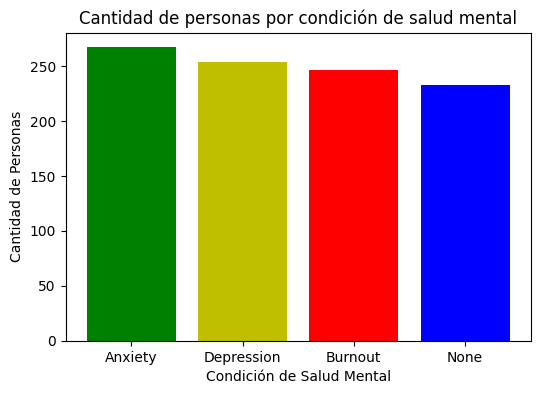

In [28]:
frecuencia = Data_muestra['Mental_Health_Condition'].value_counts()
plt.figure(figsize=(6,4))
colores = ['g', 'y', 'r', 'b']
plt.bar(frecuencia.index, frecuencia.values, color=colores)
plt.title('Cantidad de personas por condición de salud mental')
plt.xlabel('Condición de Salud Mental')
plt.ylabel('Cantidad de Personas')

plt.show()

Con la información entregada en el gráfico podemos ver que todas las condiciones, incluyendo a None, se distribuyen de forma casi pareja en la sociedad. En primer lugar se encuentra Ansiedad, seguida de cerca por Depresión, luego Burnout y en último lugar, Ninguna.

**Pregunta 2: ¿La edad afecta positiva o negativamente en la salud mental?**

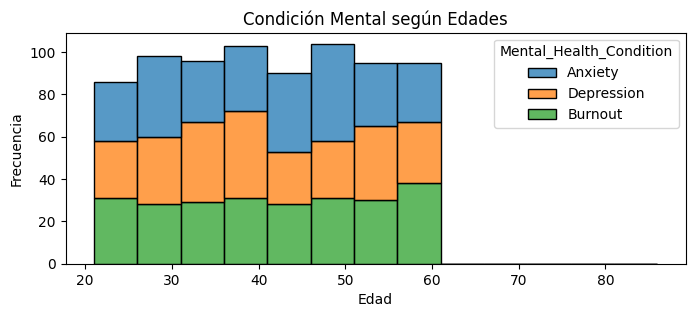

In [18]:
plt.figure(figsize=(8,3))
bin_width = 5
bin_range = range(21, 91, bin_width)
sns.histplot(data=Data_muestra_con_nulls, x='Age', hue="Mental_Health_Condition", multiple="stack", bins=bin_range)
plt.title('Condición Mental según Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.show()

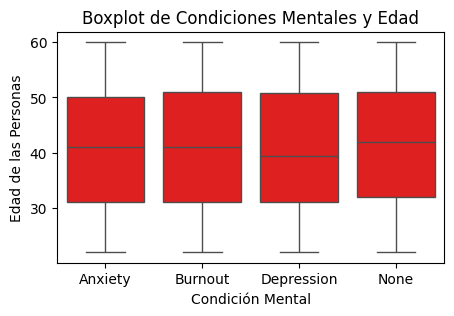

In [19]:
plt.figure(figsize=(5,3))
sns.boxplot(data=Data_muestra, x='Mental_Health_Condition', y='Age', color='r')

plt.title('Boxplot de Condiciones Mentales y Edad')
plt.xlabel('Condición Mental')
plt.ylabel('Edad de las Personas')
plt.xticks(rotation=0)
plt.show()

Dada la información del Histograma se puede concluir que la edad donde menos se sufren trastornos psicológicos es en el rango de 21 a 25 años. Pero si bien se ven algunas alzas y caídas, no se puede concluir que los trastornos psicológicos se concentren en un rango de edad, ya que tienen alta presencia en todos los rangos de edades. Esto se confirma con el gráfico de Boxplot, donde se observa que todos los trastornos se mueven al rededor de las mismas edades y con cuartiles similares.




**Pregunta 3: ¿Los trastornos psicológicos tienen relación con las horas de trabajo? De ser así, ¿la edad tiene relación con la cantidad de horas trabajadas a la semana?**

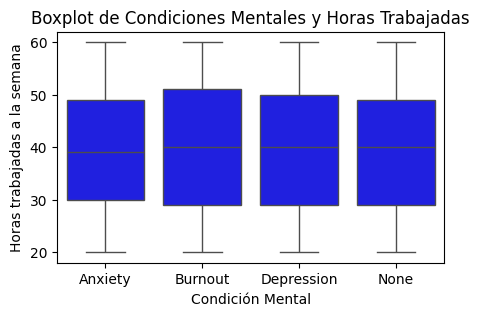

In [20]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df, x='Mental_Health_Condition', y='Hours_Worked_Per_Week', color='b')

plt.title('Boxplot de Condiciones Mentales y Horas Trabajadas')
plt.xlabel('Condición Mental')
plt.ylabel('Horas trabajadas a la semana')
plt.xticks(rotation=0)
plt.show()

Dados los gráficos anteriores, no se puede establecer que a mayor horas de trabajo a la semana los trabajadores sufren más ansiedad, depresión o burnout. El promedio de horas de trabajo de las personas con alguna condición mental es cercano a las 40 horas a la semana.

Text(0, 0.5, 'Horas trabajadas a la semana')

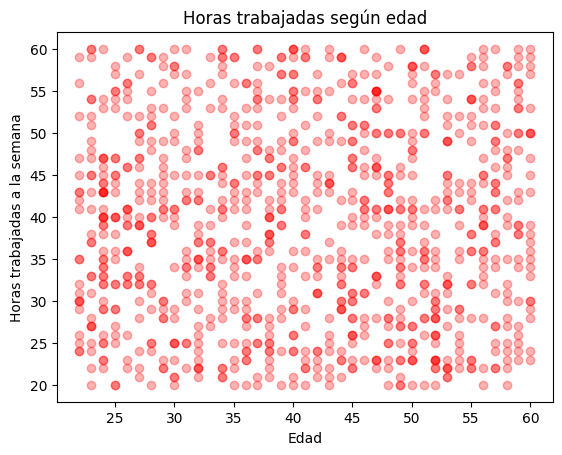

In [22]:

fig, ax = plt.subplots()
ax.scatter(Data_muestra.Age, Data_muestra.Hours_Worked_Per_Week, alpha=0.3, color='r')
ax.set_title('Horas trabajadas según edad')
ax.set_xlabel('Edad')
ax.set_ylabel('Horas trabajadas a la semana')

Del gráfico Scatter se puede concluir que las horas trabajadas no tienen relación con la edad; la dispersión es muy alta.

**Pregunta 4: ¿Existe una tendencia entre la puntuación del balance de la vida laboral y personal, y el desarrollo de un trastorno psicológico?**


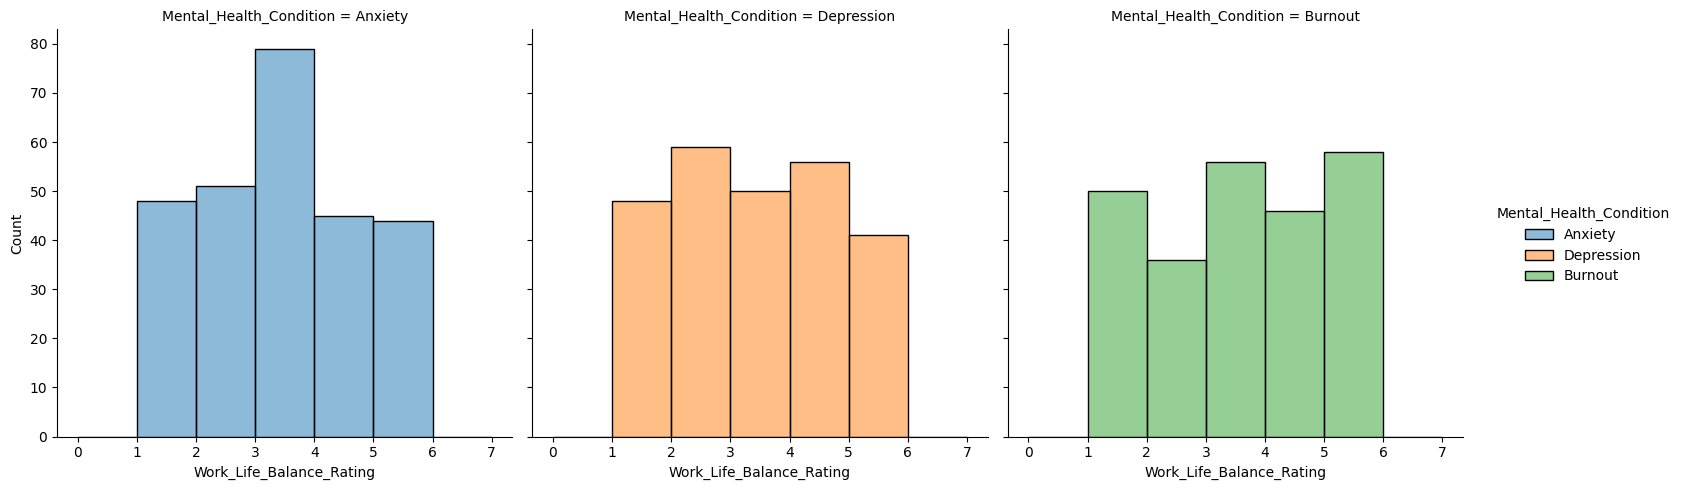

In [23]:
# establecer los límites y bines para el histograma
bin_width = 1
bin_range = range(0, 8, bin_width)

# crear un histograma del nivel de quilibrio entre la vida personal y el trabajo
sns.displot(data=Data_muestra_con_nulls, x="Work_Life_Balance_Rating", hue="Mental_Health_Condition", col="Mental_Health_Condition", bins=bin_range)

No se aprecia una tendencia entre balance entre la vida personal-laboral y condición mental, ya que incluso los que tienen mayor puntuación en el balance de vida tienen una frecuencia similar a los de menor puntuación. Destaca que los que tienen una puntuación 3 son los que sufren más ansiedad, y los de puntuación 5 son los que más sufren burnout.

**Pregunta 5: ¿Existe una tendencia o relación entre los trastornos psicológicos y el aislamiento social?**

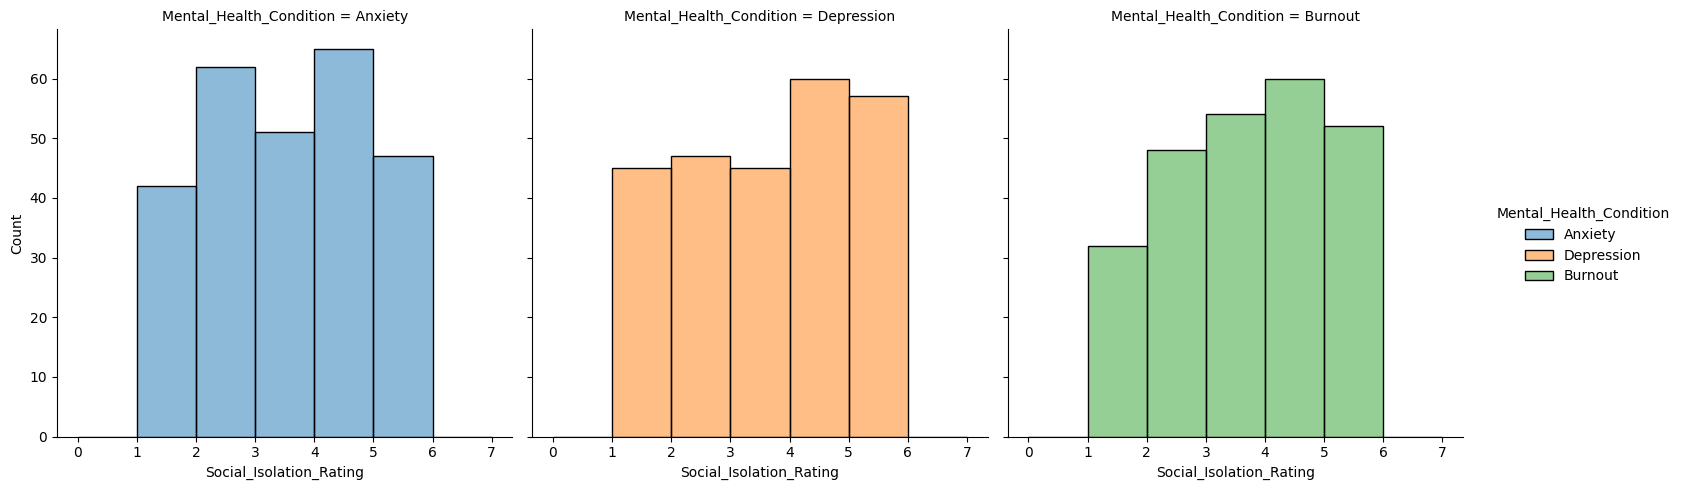

In [25]:
# establecer los límites y bines para el histograma
bin_width = 1
bin_range = range(0, 8, bin_width)

# crear un histograma del nivel de aislamiento
sns.displot(data=Data_muestra_con_nulls, x="Social_Isolation_Rating", hue="Mental_Health_Condition", col="Mental_Health_Condition", bins=bin_range)

Se aprecia una sutil tendencia entre un mayor sentimiento de aislamiento social y desarrollo de una condición mental como depresión o burnout.
Esto llevó a la pregunta de si el trabajo remoto genera en las personas una mayor sensación de aislamiento social que los que trabajan de manera presencial, lo cual se puso a prueba con el gráfico siguiente:

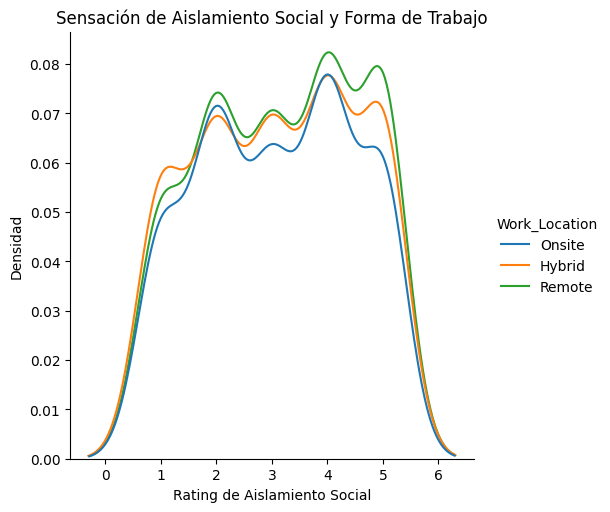

In [31]:
sns.displot(data=Data_muestra, x="Social_Isolation_Rating", hue="Work_Location", kind="kde")
plt.title('Sensación de Aislamiento Social y Forma de Trabajo')
plt.xlabel('Rating de Aislamiento Social')
plt.ylabel('Densidad')
plt.show()

Si bien se observa una distribución casi pareja del aislamiento social y el método de trabajo, abundan más los que tienen trabajo remoto y una alta sensación de aislamiento social.